<h2 align="center">Codebasics DL Course: PyTorch Datasets and DataLoaders</h2>

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. Datasets

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14911013.64it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 320004.97it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5547054.01it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5266409.02it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [ ]:
len(training_data)

60000

In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
len(test_data)

10000

In [ ]:
image, label = training_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

9

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

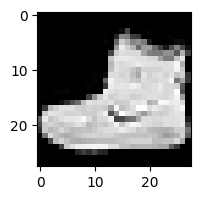

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

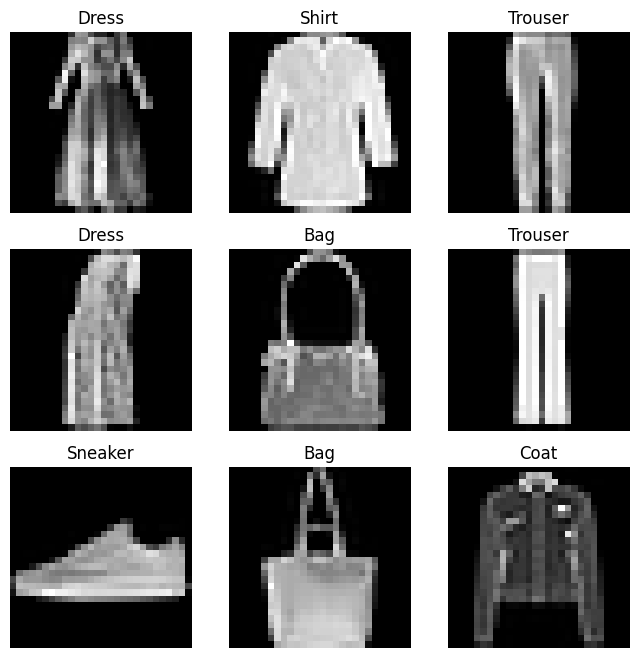

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 2. DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
for images, labels in train_dataloader:
    print(images.size())
    break

torch.Size([64, 1, 28, 28])


In [ ]:
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

In [ ]:
images.size()

torch.Size([64, 1, 28, 28])

In [ ]:
img = images[2].squeeze()
label = labels[2]

In [ ]:
label.item()

8

In [ ]:
labels_map[label.item()]

'Bag'

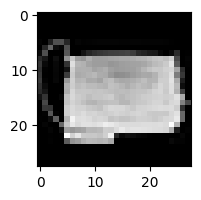

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(img, cmap="gray")
plt.show()